<div dir="rtl">
  تمرین سری دوم درس شبیه سازی رایانه ای در فیزیک
<br>
    سوال 3.1
<br>
    علیرضا رضایی
<br>
    97100762
</div>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from seaborn import set as sset; sset()
from sklearn.linear_model import LinearRegression

In [166]:
# configs --------------------------


# length of the system
L = 200

# max time to wait
t_max = 25000

# each delta t we change the plot color to see layers better
delta_t_to_change_color = 20*L

In [167]:
class Fig:
    def __init__(self, L, t_max):
        self.t = range(t_max)
        self.L = L
        self.t_max = t_max
        
        # height at any points
        self.h = np.zeros(L)
        
        # a grid of three numbers to color the pixels
        self.grid = np.zeros([t_max, L])
        self.current_color_number = 1
        
        self.hbar = np.zeros(t_max)
        self.var_h = np.zeros(t_max)
        
    def add_a_particle_at_a_random_place(self, t):
        random_place = np.random.randint(self.L)
        
        # current height of random selected place
        current_height = int(self.h[random_place])
        
        # change the color after some layer
        if t % delta_t_to_change_color == 0:
            if self.current_color_number == 1:
                self.current_color_number = 2
            else:
                self.current_color_number = 1
            
        self.grid[current_height, random_place] = self.current_color_number
        
        # we do this after updating grid because ploting starts at 0 and after one pixel its height will be 1
        # but it has to ploted at position 0
        self.h[random_place] += 1
        
        # calculate hbar and var_h after each time step
        self.hbar[t] = self.h.mean()
        self.var_h[t] = np.sqrt((self.h**2).mean() - self.h.mean()**2)
        
    def draw(self, color="blue"):
        plt.xlim([-0.5, L+0.5])
        plt.ylim([-0.5, self.h.max()+0.5])
        plt.grid(linewidth=0)
        plt.xlabel("L")
        plt.ylabel("h")
        
        cmap = colors.ListedColormap(['white', 'blue', "yellow"])
        
        plt.imshow(self.grid, cmap=cmap)
        
    def run(self, show_plot=False):
        for t in self.t:
            self.add_a_particle_at_a_random_place(t)
        
        if show_plot:
            self.draw()

In [168]:
def do_calculations(fig, show_plots=False):
    '''do some calculation after creating fig object from Fig class'''
    
    if show_plots:
        plt.plot(fig.t, fig.hbar)
        plt.xlabel("t")
        plt.ylabel("average(h)")

        plt.figure()
        plt.plot(fig.t, fig.var_h)
        plt.xlabel("t")
        plt.ylabel("W")

        plt.figure()
        plt.plot(np.log(fig.t[1:]), np.log(fig.var_h[1:]))
        plt.xlabel("ln(t)")
        plt.ylabel("ln(W)")


    x = np.log(fig.t[1:])
    y = np.log(fig.var_h[1:])

    reg = LinearRegression().fit(x.reshape(-1, 1), y)
    
    r2 = reg.score(x.reshape(-1, 1), y)
    a = reg.coef_
    b = reg.intercept_
    model_y = reg.predict(x.reshape(-1, 1))
    
    if show_plots:
        plt.figure()
        plt.title(f"ln(W) = {round(a[0], 4)}ln(t) + ({round(b, 4)}) \n $r^2={round(r2, 4)}$")
        plt.plot(x, y, label="data")
        plt.plot(x, model_y, label="best line")
        plt.xlabel("ln(t)")
        plt.ylabel("ln(W)")

        plt.legend()
    
    return a[0]

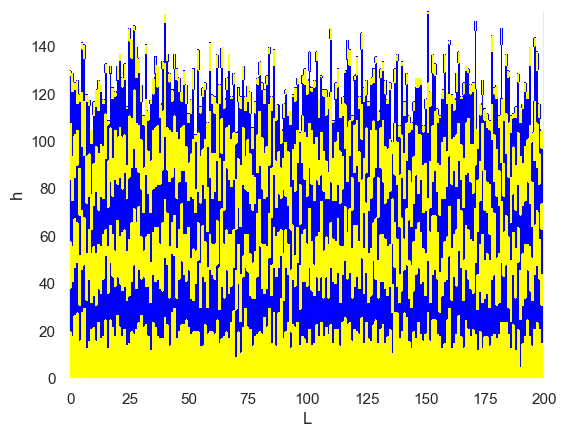

In [169]:
fig = Fig(L, t_max)

fig.run(show_plot=True)

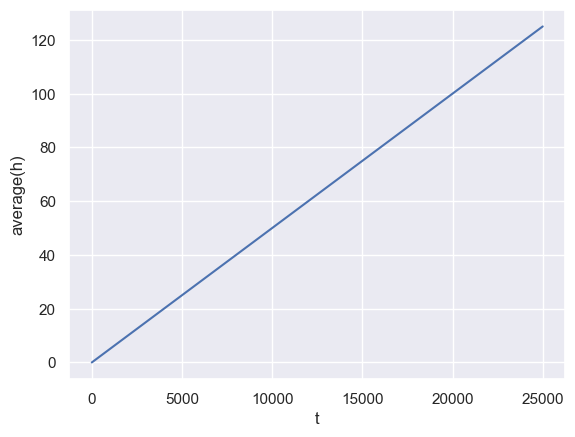

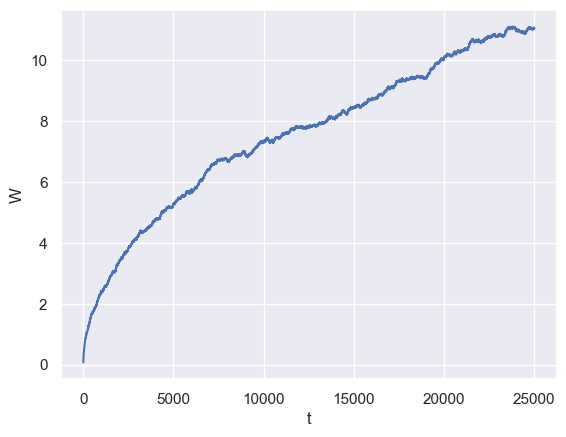

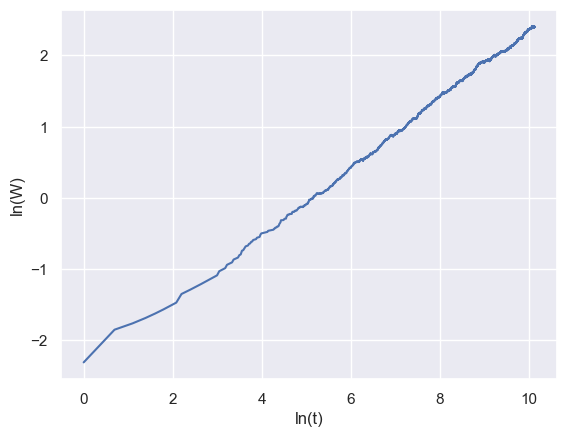

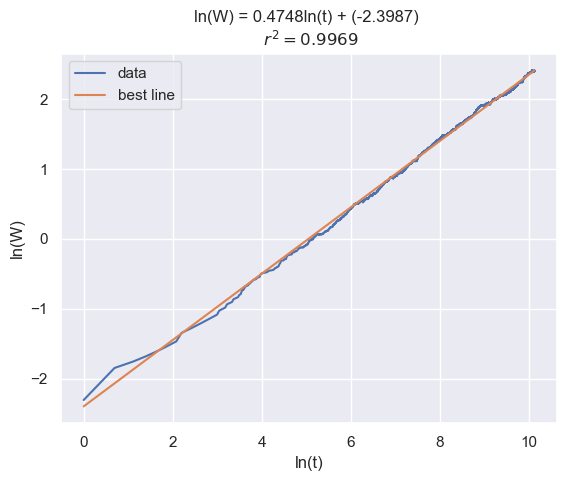

In [170]:
do_calculations(fig, show_plots=True);

In [189]:
# calculate betta 10 times

n = 10

some_betta = np.zeros(n)
for i in range(n):
    fig = Fig(L, t_max)
    fig.run()
    
    some_bettas[i] = do_calculations(fig)

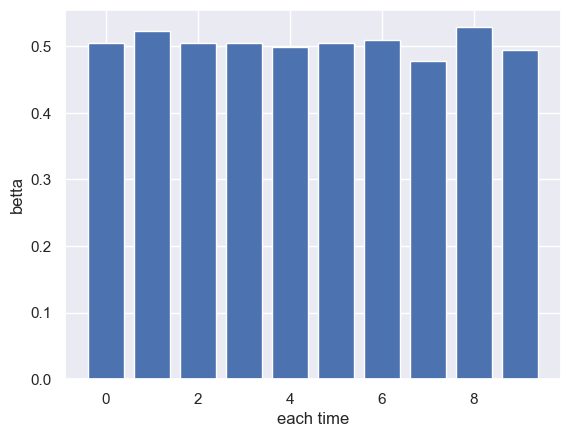

In [190]:
plt.bar(range(n), some_bettas)

plt.xlabel("each time")
plt.ylabel("betta");

In [191]:
# mean of 10 betta

round(some_bettas.mean(), 4)

0.5049

In [192]:
# error of betta (variance of 10 betta)

round(some_bettas.var(), 4)

0.0002